In [2]:
# Implement 2D DCT . plot the basis image of DCT .
# Modify the code to apply a high pass filter by setting low frequency components (center region) to zero. Compare the image.

#  implement a low pass filter in the frequency domain by keeping only the lowest frequency components . (sharpening).

# Do these from DFT, DCT...DFT -> Shift -> Filter -> Shift -> inverse

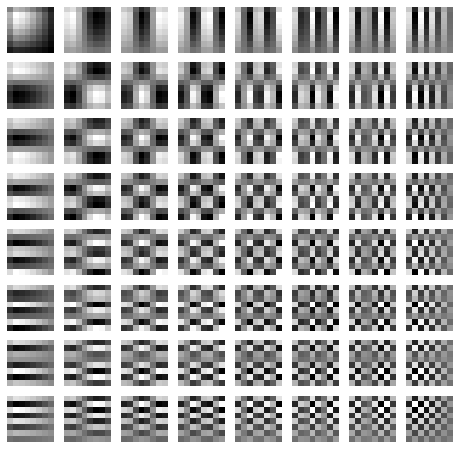

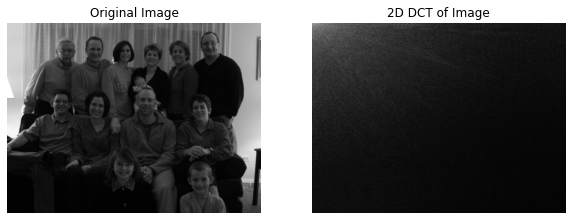

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def compute_2d_dct(image):

    image_float = np.float32(image)
    return cv2.dct(image_float)

def plot_dct_basis(size=8):
    fig, axes = plt.subplots(size, size, figsize=(8, 8))
    for i in range(size):
        for j in range(size):
          
            basis = np.zeros((size, size))
            basis[i, j] = 1
           
            dct_basis = cv2.dct(np.float32(basis))

            axes[i, j].imshow(dct_basis, cmap='gray')
            axes[i, j].axis('off')
    plt.show()


image = cv2.imread('p5.jpg', cv2.IMREAD_GRAYSCALE)


if image is None:
    print("Image not found.")
else:

    plot_dct_basis(size=8)

    dct_image = compute_2d_dct(image)

  
    plt.figure(figsize=(10, 5))

 
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')


    plt.subplot(1, 2, 2)
    plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')
    plt.title('2D DCT of Image')
    plt.axis('off')

    plt.show()


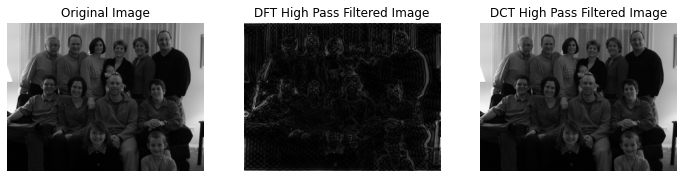

In [10]:

def apply_high_pass_filter_dft(image, cutoff=30):
  
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    

    dft_shift = np.fft.fftshift(dft)
    

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    

    mask = np.ones((rows, cols, 2), np.uint8)
    r = cutoff
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask[mask_area] = 0


    dft_shift_filtered = dft_shift * mask
    

    dft_ishift = np.fft.ifftshift(dft_shift_filtered)
    
    
    img_back = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back


def apply_high_pass_filter_dct(image, cutoff=30):

    dct_image = cv2.dct(np.float32(image))
    
 
    rows, cols = dct_image.shape
    crow, ccol = rows // 2, cols // 2
    

    dct_image[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    

    img_back = cv2.idct(dct_image)
    
    return img_back


image = cv2.imread('p5.jpg', cv2.IMREAD_GRAYSCALE)


if image is None:
    print("Image not found.")
else:
    
    dft_filtered_image = apply_high_pass_filter_dft(image, cutoff=30)
    
    
    dct_filtered_image = apply_high_pass_filter_dct(image, cutoff=30)

 
    plt.figure(figsize=(12, 8))

   
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

   
    plt.subplot(1, 3, 2)
    plt.imshow(dft_filtered_image, cmap='gray')
    plt.title('DFT High Pass Filtered Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(dct_filtered_image, cmap='gray')
    plt.title('DCT High Pass Filtered Image')
    plt.axis('off')

    plt.show()


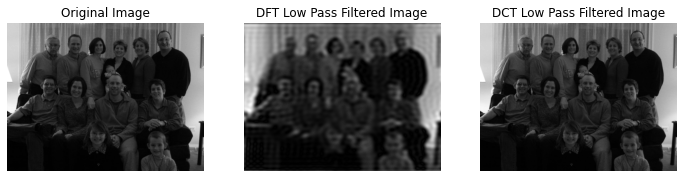

In [11]:


def apply_low_pass_filter_dft(image, cutoff=30):

    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    

    dft_shift = np.fft.fftshift(dft)
    

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    

    mask = np.zeros((rows, cols, 2), np.uint8)
    r = cutoff
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask[mask_area] = 1

  
    dft_shift_filtered = dft_shift * mask
    
 
    dft_ishift = np.fft.ifftshift(dft_shift_filtered)
    

    img_back = cv2.idft(dft_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back


def apply_low_pass_filter_dct(image, cutoff=30):

    dct_image = cv2.dct(np.float32(image))
    

    rows, cols = dct_image.shape
    crow, ccol = rows // 2, cols // 2
    

    dct_image[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    

    img_back = cv2.idct(dct_image)
    
    return img_back


image = cv2.imread('p5.jpg', cv2.IMREAD_GRAYSCALE)


if image is None:
    print("Image not found.")
else:
   
    dft_filtered_image = apply_low_pass_filter_dft(image, cutoff=30)
    

    dct_filtered_image = apply_low_pass_filter_dct(image, cutoff=30)

   
    plt.figure(figsize=(12, 8))

   
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

  
    plt.subplot(1, 3, 2)
    plt.imshow(dft_filtered_image, cmap='gray')
    plt.title('DFT Low Pass Filtered Image')
    plt.axis('off')


    plt.subplot(1, 3, 3)
    plt.imshow(dct_filtered_image, cmap='gray')
    plt.title('DCT Low Pass Filtered Image')
    plt.axis('off')

    plt.show()
